<a href="https://colab.research.google.com/github/karandomguy/Phishing-Email-Detection/blob/main/exploring_phishing_dataset_using_mnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
! pip install kaggle


In [48]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [49]:
! cp kaggle.json ~/.kaggle/

In [50]:
! chmod 600 ~/.kaggle/kaggle.json

In [51]:
!kaggle datasets download -d subhajournal/phishingemails

phishingemails.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
import zipfile
import pandas as pd


In [53]:
df = pd.read_csv('phishingemails.zip',compression='zip')

In [54]:
df

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email


In [55]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [56]:
df['Email Text'][0]

're : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson \'s observations on us use of \'s on \' but not \'d aughter \' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n\'t normally use \' brother \' in this way any more than we do \'d aughter \' , and it is hard to imagine a natural class comprising senior relatives and \'s on \' but excluding \' brother \' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone \'s attention , and hence at the beginning of an utterance , whereas \'s on \' seems more natural in utterances like \' yes , son \' , \' hand me that , son \' than in ones like \' son ! \' or \' son , help me ! \' ( although perhaps these

In [57]:
df['Email Text'][1]

'the other side of * galicismos * * galicismo * is a spanish term which names the improper introduction of french words which are spanish sounding and thus very deceptive to the ear . * galicismo * is often considered to be a * barbarismo * . what would be the term which designates the opposite phenomenon , that is unlawful words of spanish origin which may have crept into french ? can someone provide examples ? thank you joseph m kozono < kozonoj @ gunet . georgetown . edu >'

In [58]:
for i in range(0,18650):
  if df['Email Type'][i]=='Safe Email':
    df['Email Type'][i]=1
  else:
    df['Email Type'][i]=0

<ipython-input-58-3d8a3d30548c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Email Type'][i]=1
<ipython-input-58-3d8a3d30548c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Email Type'][i]=0


In [59]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,1,the other side of * galicismos * * galicismo *...,1
2,2,re : equistar deal tickets are you still avail...,1
3,3,\nHello I am your hot lil horny toy.\n I am...,0
4,4,software at incredibly low prices ( 86 % lower...,0


In [60]:
import nltk
nltk.download('punkt')
import spacy
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
nlp=spacy.load("en_core_web_sm")

In [62]:
doc=nlp(df['Email Text'][0])
print(doc)

re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson 's observations on us use of 's on ' but not 'd aughter ' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n't normally use ' brother ' in this way any more than we do 'd aughter ' , and it is hard to imagine a natural class comprising senior relatives and 's on ' but excluding ' brother ' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone 's attention , and hence at the beginning of an utterance , whereas 's on ' seems more natural in utterances like ' yes , son ' , ' hand me that , son ' than in ones like ' son ! ' or ' son , help me ! ' ( although perhaps these latter ones are not compl

In [63]:
sentence = []
for w in doc:
  if w.text != 'n' and not w.is_stop and not w.is_punct and not   w.like_num:
    sentence.append(w.lemma_)
print(sentence)

['disc', 'uniformitarianism', 'sex', 'lang', 'dick', 'hudson', 'observation', 'use', 'aughter', 'vocative', 'thought', 'provoking', 'sure', 'fair', 'attribute', 'son', 'treat', 'like', 'senior', 'relative', 'thing', 'normally', 'use', 'brother', 'way', 'aughter', 'hard', 'imagine', 'natural', 'class', 'comprise', 'senior', 'relative', 'exclude', 'brother', 'difference', 'imagine', 'distinction', 'senior', 'relative', 'term', 'wide', 'variety', 'contexts', 'e', 'g', 'call', 'distance', 'attention', 'beginning', 'utterance', 'natural', 'utterance', 'like', 'yes', 'son', 'hand', 'son', 'one', 'like', 'son', 'son', 'help', 'one', 'completely', 'impossible', 'alexis', 'mr']


In [64]:
df.rename(columns = {'Email Text':'Text'}, inplace = True)

In [65]:
df.rename(columns = {'Email Type':'Type'}, inplace = True)

In [66]:
df.head()

,Unnamed: 0,Text,Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,1,the other side of * galicismos * * galicismo *...,1
2,2,re : equistar deal tickets are you still avail...,1
3,3,\nHello I am your hot lil horny toy.\n I am...,0
4,4,software at incredibly low prices ( 86 % lower...,0


In [67]:
df.Text=df.Text.astype(str)

In [68]:
df.head()

,Unnamed: 0,Text,Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,1,the other side of * galicismos * * galicismo *...,1
2,2,re : equistar deal tickets are you still avail...,1
3,3,\nHello I am your hot lil horny toy.\n I am...,0
4,4,software at incredibly low prices ( 86 % lower...,0


In [69]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    words = word_tokenize(text)

    no_stop_words = [word for word in words if word.isalpha() and word.lower() not in stop_words]

    return no_stop_words

df['Text'] = df['Text'].apply(lambda text: ' '.join(preprocess(text)))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [70]:
df.head()

,Unnamed: 0,Text,Type
0,0,disc uniformitarianism sex lang dick hudson ob...,1
1,1,side galicismos galicismo spanish term names i...,1
2,2,equistar deal tickets still available assist r...,1
3,3,Hello hot lil horny toy one dream open minded ...,0
4,4,software incredibly low prices lower drapery s...,0


In [74]:
df=df.apply(lambda x: x.astype(str).str.lower())

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.Type,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Type
)

In [80]:
print(X_train.shape)
X_train.head()

(14920,)


7677    hpl meter texaco fee c p daren period gas flow...
9591    would like top rated law firm working family b...
3447    osez nous visiter la po sie rotique est de plu...
8499    tombrandon bigger fuller breasts naturally wee...
2659    bulgarian summer classes u content length coll...
Name: Text, dtype: object

In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

pip = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),
     ('Multi NB', MultinomialNB())
])

pip.fit(X_train, y_train)

y_pred = pip.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1466
           1       0.98      0.95      0.97      2264

    accuracy                           0.96      3730
   macro avg       0.95      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1419,   47],
       [ 106, 2158]])

Text(95.72222222222221, 0.5, 'Truth')

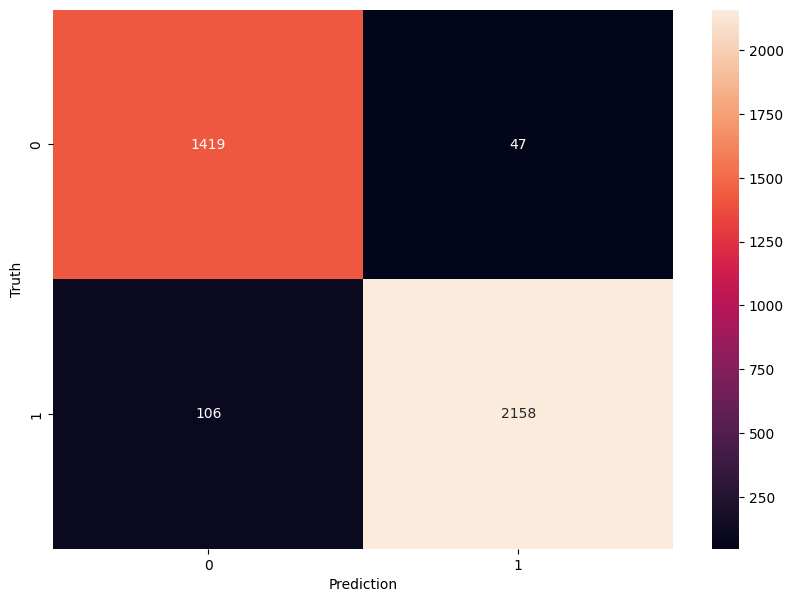

In [86]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')